### Tratamiento básico de archivo ENVI (hiperespectro)

In [199]:
import spectral
from spectral import *
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [200]:
# Indicar la ruta a la carpeta que contiene el archivo ENVI
input_folder = 'imgdata'

# Nombre base del archivo ENVI header (sin extensión)
base_name = 'solaire'

# Rutas para los archivos header y data
header_file = f"{input_folder}\\{base_name}.hdr"
data_file = f"{input_folder}\\{base_name}.bsq"

In [201]:
# Leer la imagen hiperespectro usando spectral
spectral_img = spectral.open_image(header_file)

# Acceder como un array de NumPy
hyperspectral_data = spectral_img.load()

In [202]:
# Utilizando K-Means se establecen 7 centroides (endmembers) y 30 iteraciones
(m, c) = kmeans(hyperspectral_data, 7, 30)

# Redimensionar las etiquetas de clustering para encajar con las dimensiones de la imagen
cluster_labels = m.flatten()

# Asignar a cada uno de los 7 clusters uno de 3 colores (RGB)
RGB = 3
cluster_colors = np.random.rand(7, RGB)

# Crear una imagen segmentada en color
segmented_img = np.zeros((hyperspectral_data.shape[0], hyperspectral_data.shape[1], RGB)) # Inicia con shape (M, N, 3)

spectral:INFO: k-means iteration 1 - 45349 pixels reassigned.
spectral:INFO: k-means iteration 2 - 4902 pixels reassigned.
spectral:INFO: k-means iteration 3 - 2411 pixels reassigned.
spectral:INFO: k-means iteration 4 - 1685 pixels reassigned.
spectral:INFO: k-means iteration 5 - 1276 pixels reassigned.
spectral:INFO: k-means iteration 6 - 942 pixels reassigned.
spectral:INFO: k-means iteration 7 - 833 pixels reassigned.
spectral:INFO: k-means iteration 8 - 746 pixels reassigned.
spectral:INFO: k-means iteration 9 - 545 pixels reassigned.
spectral:INFO: k-means iteration 10 - 334 pixels reassigned.
spectral:INFO: k-means iteration 11 - 357 pixels reassigned.
spectral:INFO: k-means iteration 12 - 342 pixels reassigned.
spectral:INFO: k-means iteration 13 - 377 pixels reassigned.
spectral:INFO: k-means iteration 14 - 332 pixels reassigned.
spectral:INFO: k-means iteration 15 - 276 pixels reassigned.
spectral:INFO: k-means iteration 16 - 274 pixels reassigned.
spectral:INFO: k-means iter

In [203]:
# Lista para almacenar las etiquetas de clase para la leyenda
legend_labels = []

for i in range(hyperspectral_data.shape[0]): # Iterar sobre las filas (altura - 251 pixels)
    for j in range(hyperspectral_data.shape[1]): # Iterar sobre las columnas (anchura - 201 pixels)
        label = cluster_labels[i * hyperspectral_data.shape[1] + j] # Etiqueta de cada pixel según el cluster en el que esté
        segmented_img[i, j] = cluster_colors[label] # Colorea el pixel de la imagen segmentada en base a su etiqueta

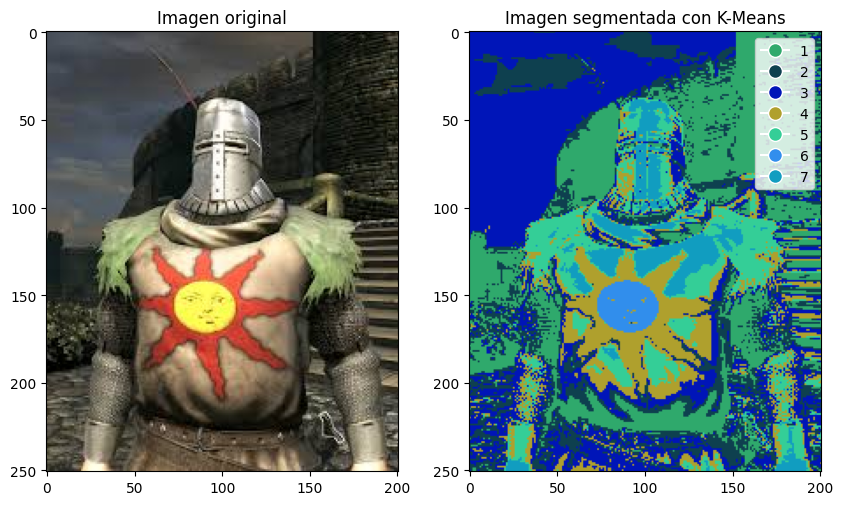

In [204]:
# Cargar la imagen original
img_original = Image.open('imgdata\\solaire_original.jpg')

# Configurar subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 7)) # 1 fila, 2 columnas

axes[0].imshow(img_original)
axes[0].set_title('Imagen original')
axes[1].imshow(segmented_img)
axes[1].set_title('Imagen segmentada con K-Means')
axes[1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[label], markersize=10, label=str(label + 1)) for label in range(7)], loc='upper right')

plt.show()